<a href="https://colab.research.google.com/github/200612780/Assignemt-1-Employee-Productivity-Wellness-Insight-tool-AIDI1002/blob/main/assignment_1_employee_productivity_wellness_insights_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
#PART 1 — Load & Explore Dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded = files.upload()

Saving assignment1_dataset.csv to assignment1_dataset (8).csv


In [103]:
df = pd.read_csv("assignment1_dataset.csv")
original_df_for_plot=df.copy()

In [104]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,EmployeeID,Gender,Age,WorkHours,SleepHours,AttendanceRate,PreviousPerformance,EducationLevel,RemoteWork,ProductivityScore
0,E001,Male,29,8,7,92,78,Bachelor,Yes,82
1,E002,Female,34,9,6,88,85,Master,No,87
2,E003,Male,41,10,5,95,90,PhD,No,92
3,E004,Female,26,7,8,85,72,Bachelor,Yes,79
4,E005,Male,38,9,6,90,88,Master,Yes,86


In [105]:
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           20 non-null     object
 1   Gender               20 non-null     object
 2   Age                  20 non-null     int64 
 3   WorkHours            20 non-null     int64 
 4   SleepHours           20 non-null     int64 
 5   AttendanceRate       20 non-null     int64 
 6   PreviousPerformance  20 non-null     int64 
 7   EducationLevel       20 non-null     object
 8   RemoteWork           20 non-null     object
 9   ProductivityScore    20 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 1.7+ KB


In [106]:
print("\nSummary Statistics:")
display(df.describe(include="all"))


Summary Statistics:


,EmployeeID,Gender,Age,WorkHours,SleepHours,AttendanceRate,PreviousPerformance,EducationLevel,RemoteWork,ProductivityScore
count,20,20,20.000000,20.000000,20.00000,20.00000,20.000000,20,20,20.000000
unique,20,2,NaN,NaN,NaN,NaN,NaN,4,2,NaN
top,E001,Male,NaN,NaN,NaN,NaN,NaN,Bachelor,Yes,NaN
freq,1,10,NaN,NaN,NaN,NaN,NaN,7,10,NaN
mean,NaN,NaN,35.550000,8.200000,6.65000,88.75000,81.800000,NaN,NaN,84.550000
std,NaN,NaN,6.984758,1.399248,1.03999,6.19741,8.351489,NaN,NaN,6.723682
min,NaN,NaN,25.000000,6.000000,5.00000,75.00000,65.000000,NaN,NaN,72.000000
25%,NaN,NaN,29.750000,7.000000,6.00000,85.00000,76.500000,NaN,NaN,79.750000
50%,NaN,NaN,35.500000,8.000000,7.00000,90.00000,84.000000,NaN,NaN,85.500000
75%,NaN,NaN,41.000000,9.000000,7.25000,93.25000,88.250000,NaN,NaN,88.750000


In [107]:
#PART 2 — Data Cleaning
# 1) Check missing values
df.isnull().sum()

# As there are no duplicate values or missing values in the dataset i have commented the code that fills missing value.

# 2. Fill missing WorkHours with the mean
#df["WorkHours"] = df["WorkHours"].fillna(df["WorkHours"].mean())

# 3. Fill missing EducationLevel with the mode
#df["EducationLevel"] = df["EducationLevel"].fillna(df["EducationLevel"].mode()[0])

# 4. Remove duplicate rows if any
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"\nDuplicates removed: {before - after}")
print("\nMissing values after cleaning:")
display(df.isnull().sum())


Duplicates removed: 0

Missing values after cleaning:


,0
EmployeeID,0
Gender,0
Age,0
WorkHours,0
SleepHours,0
AttendanceRate,0
PreviousPerformance,0
EducationLevel,0
RemoteWork,0
ProductivityScore,0


In [108]:
# PART 3 — Feature Engineering
# Create WellnessIndex = WorkHours * SleepHours
df["WellnessIndex"] = df["WorkHours"] * df["SleepHours"]

# Create AttendanceCategory:
# High (>90)
# Medium (75–90)
# Low (<75)
def attendance_category(x):
    if x > 90:
        return "High"
    elif 75 <= x <= 90:
        return "Medium"
    else:
        return "Low"

df["AttendanceCategory"] = df["AttendanceRate"].apply(attendance_category)

display(df[["AttendanceRate", "AttendanceCategory", "WellnessIndex"]].head())

,AttendanceRate,AttendanceCategory,WellnessIndex
0,92,High,56
1,88,Medium,54
2,95,High,50
3,85,Medium,56
4,90,Medium,54


In [109]:
# PART 4 — Encoding & Scaling

# TODO 4:
# Encode Gender and EducationLevel
# Convert RemoteWork (Yes/No) into numerical form
# Scale WorkHours and AttendanceRate using StandardScaler or MinMaxScaler

import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1) One-hot encode Gender and EducationLevel
df = pd.get_dummies(df, columns=["Gender", "EducationLevel"], drop_first=True)

# 2) Convert RemoteWork Yes/No into numeric
df["RemoteWork"] = df["RemoteWork"].map({"Yes": 1, "No": 0})

# 3) Scale WorkHours and AttendanceRate
scaler = StandardScaler()
df[["WorkHours", "AttendanceRate"]] = scaler.fit_transform(df[["WorkHours", "AttendanceRate"]])

# Preview results
display(df.head())


,EmployeeID,Age,WorkHours,SleepHours,AttendanceRate,PreviousPerformance,RemoteWork,ProductivityScore,WellnessIndex,AttendanceCategory,Gender_Male,EducationLevel_Bachelor,EducationLevel_Master,EducationLevel_PhD
0,E001,29,-0.146647,7,0.538036,78,1,82,56,High,True,True,False,False
1,E002,34,0.586588,6,-0.124162,85,0,87,54,Medium,False,False,True,False
2,E003,41,1.319824,5,1.034685,90,0,92,50,High,True,False,False,True
3,E004,26,-0.879883,8,-0.620811,72,1,79,56,Medium,False,True,False,False
4,E005,38,0.586588,6,0.206937,88,1,86,54,Medium,True,False,True,False


In [110]:
display(df)


,EmployeeID,Age,WorkHours,SleepHours,AttendanceRate,PreviousPerformance,RemoteWork,ProductivityScore,WellnessIndex,AttendanceCategory,Gender_Male,EducationLevel_Bachelor,EducationLevel_Master,EducationLevel_PhD
0,E001,29,-0.146647,7,0.538036,78,1,82,56,High,True,True,False,False
1,E002,34,0.586588,6,-0.124162,85,0,87,54,Medium,False,False,True,False
2,E003,41,1.319824,5,1.034685,90,0,92,50,High,True,False,False,True
3,E004,26,-0.879883,8,-0.620811,72,1,79,56,Medium,False,True,False,False
4,E005,38,0.586588,6,0.206937,88,1,86,54,Medium,True,False,True,False
5,E006,31,-0.146647,7,0.703585,80,0,83,56,High,False,True,False,False
6,E007,45,2.053060,5,1.365784,92,0,94,55,High,True,False,False,True
7,E008,28,-1.613118,8,-1.779657,70,1,75,48,Medium,False,False,False,False
8,E009,36,0.586588,6,0.041387,84,0,85,54,Medium,True,False,True,False
9,E010,42,-0.146647,7,0.372486,86,1,88,56,High,False,True,False,False


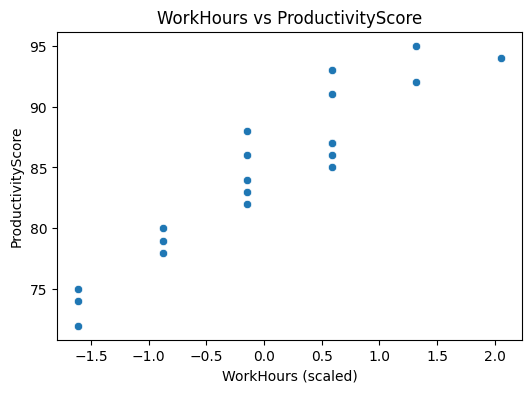

In [111]:
# PART 5 — Visualization

# 1. Scatter plot: WorkHours vs ProductivityScore
plt.figure(figsize=(6,4))
sns.scatterplot(x="WorkHours", y="ProductivityScore", data=df)
plt.title("WorkHours vs ProductivityScore")
plt.xlabel("WorkHours (scaled)")
plt.ylabel("ProductivityScore")
plt.show()



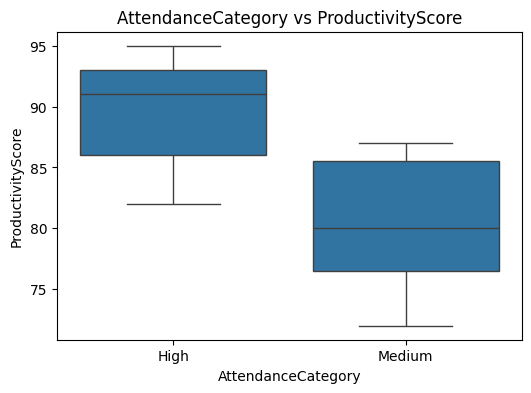

In [112]:
# 2. Boxplot: AttendanceCategory vs ProductivityScore
plt.figure(figsize=(6,4))
sns.boxplot(x="AttendanceCategory", y="ProductivityScore", data=df)
plt.title("AttendanceCategory vs ProductivityScore")
plt.xlabel("AttendanceCategory")
plt.ylabel("ProductivityScore")
plt.show()



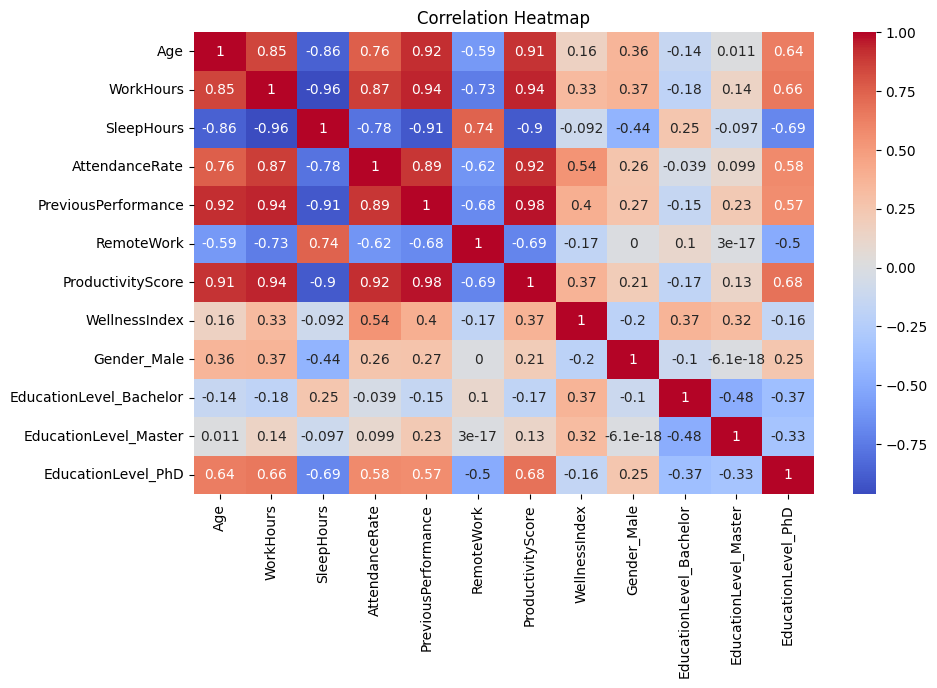

In [113]:
# 3. Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



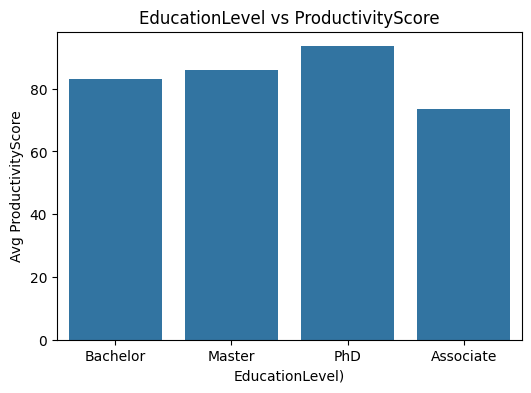

In [114]:
# 4. Bar chart: EducationLevel vs ProductivityScore
plt.figure(figsize=(6,4))
sns.barplot(x="EducationLevel", y="ProductivityScore", data=original_df_for_plot, errorbar=None)
plt.title("EducationLevel vs ProductivityScore")
plt.xlabel("EducationLevel)")
plt.ylabel("Avg ProductivityScore")
plt.show()



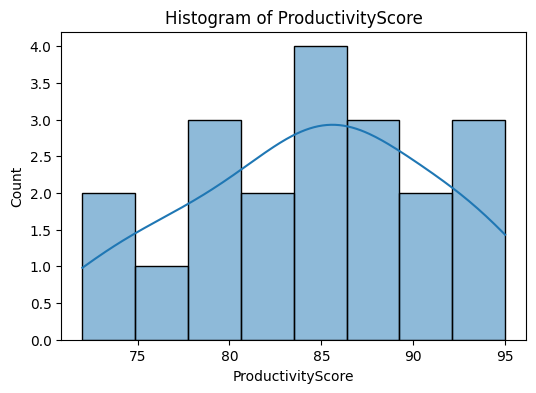

In [115]:
# 5. Histogram of ProductivityScore
plt.figure(figsize=(6,4))
sns.histplot(df["ProductivityScore"], bins=8, kde=True)
plt.title("Histogram of ProductivityScore")
plt.xlabel("ProductivityScore")
plt.ylabel("Count")
plt.show()



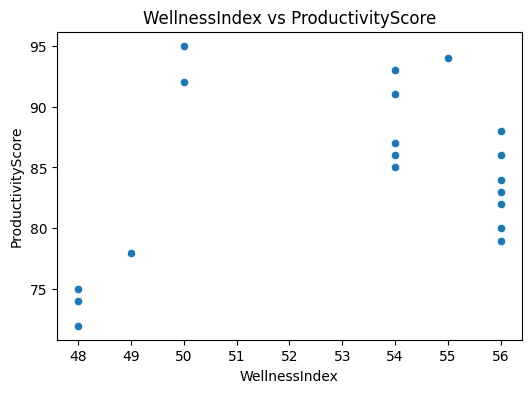

In [116]:
# 6. Scatter plot: WellnessIndex vs ProductivityScore
plt.figure(figsize=(6,4))
sns.scatterplot(x="WellnessIndex", y="ProductivityScore", data=df)
plt.title("WellnessIndex vs ProductivityScore")
plt.xlabel("WellnessIndex")
plt.ylabel("ProductivityScore")
plt.show()




In [117]:
# Write a 3-line summary of insights based on the visualizations
print("\nINSIGHTS:")
print("1. Employees with higher working hours and strong previous performance consistently achieve higher productivity scores.")
print("2. Remote work is associated with slightly lower productivity scores in this dataset.")
print("3. Productivity scores are more strongly influenced by previous performance than by age.")


INSIGHTS:
1. Employees with higher working hours and strong previous performance consistently achieve higher productivity scores.
2. Remote work is associated with slightly lower productivity scores in this dataset.
3. Productivity scores are more strongly influenced by previous performance than by age.
